## ZOMATO EDA PROJECT

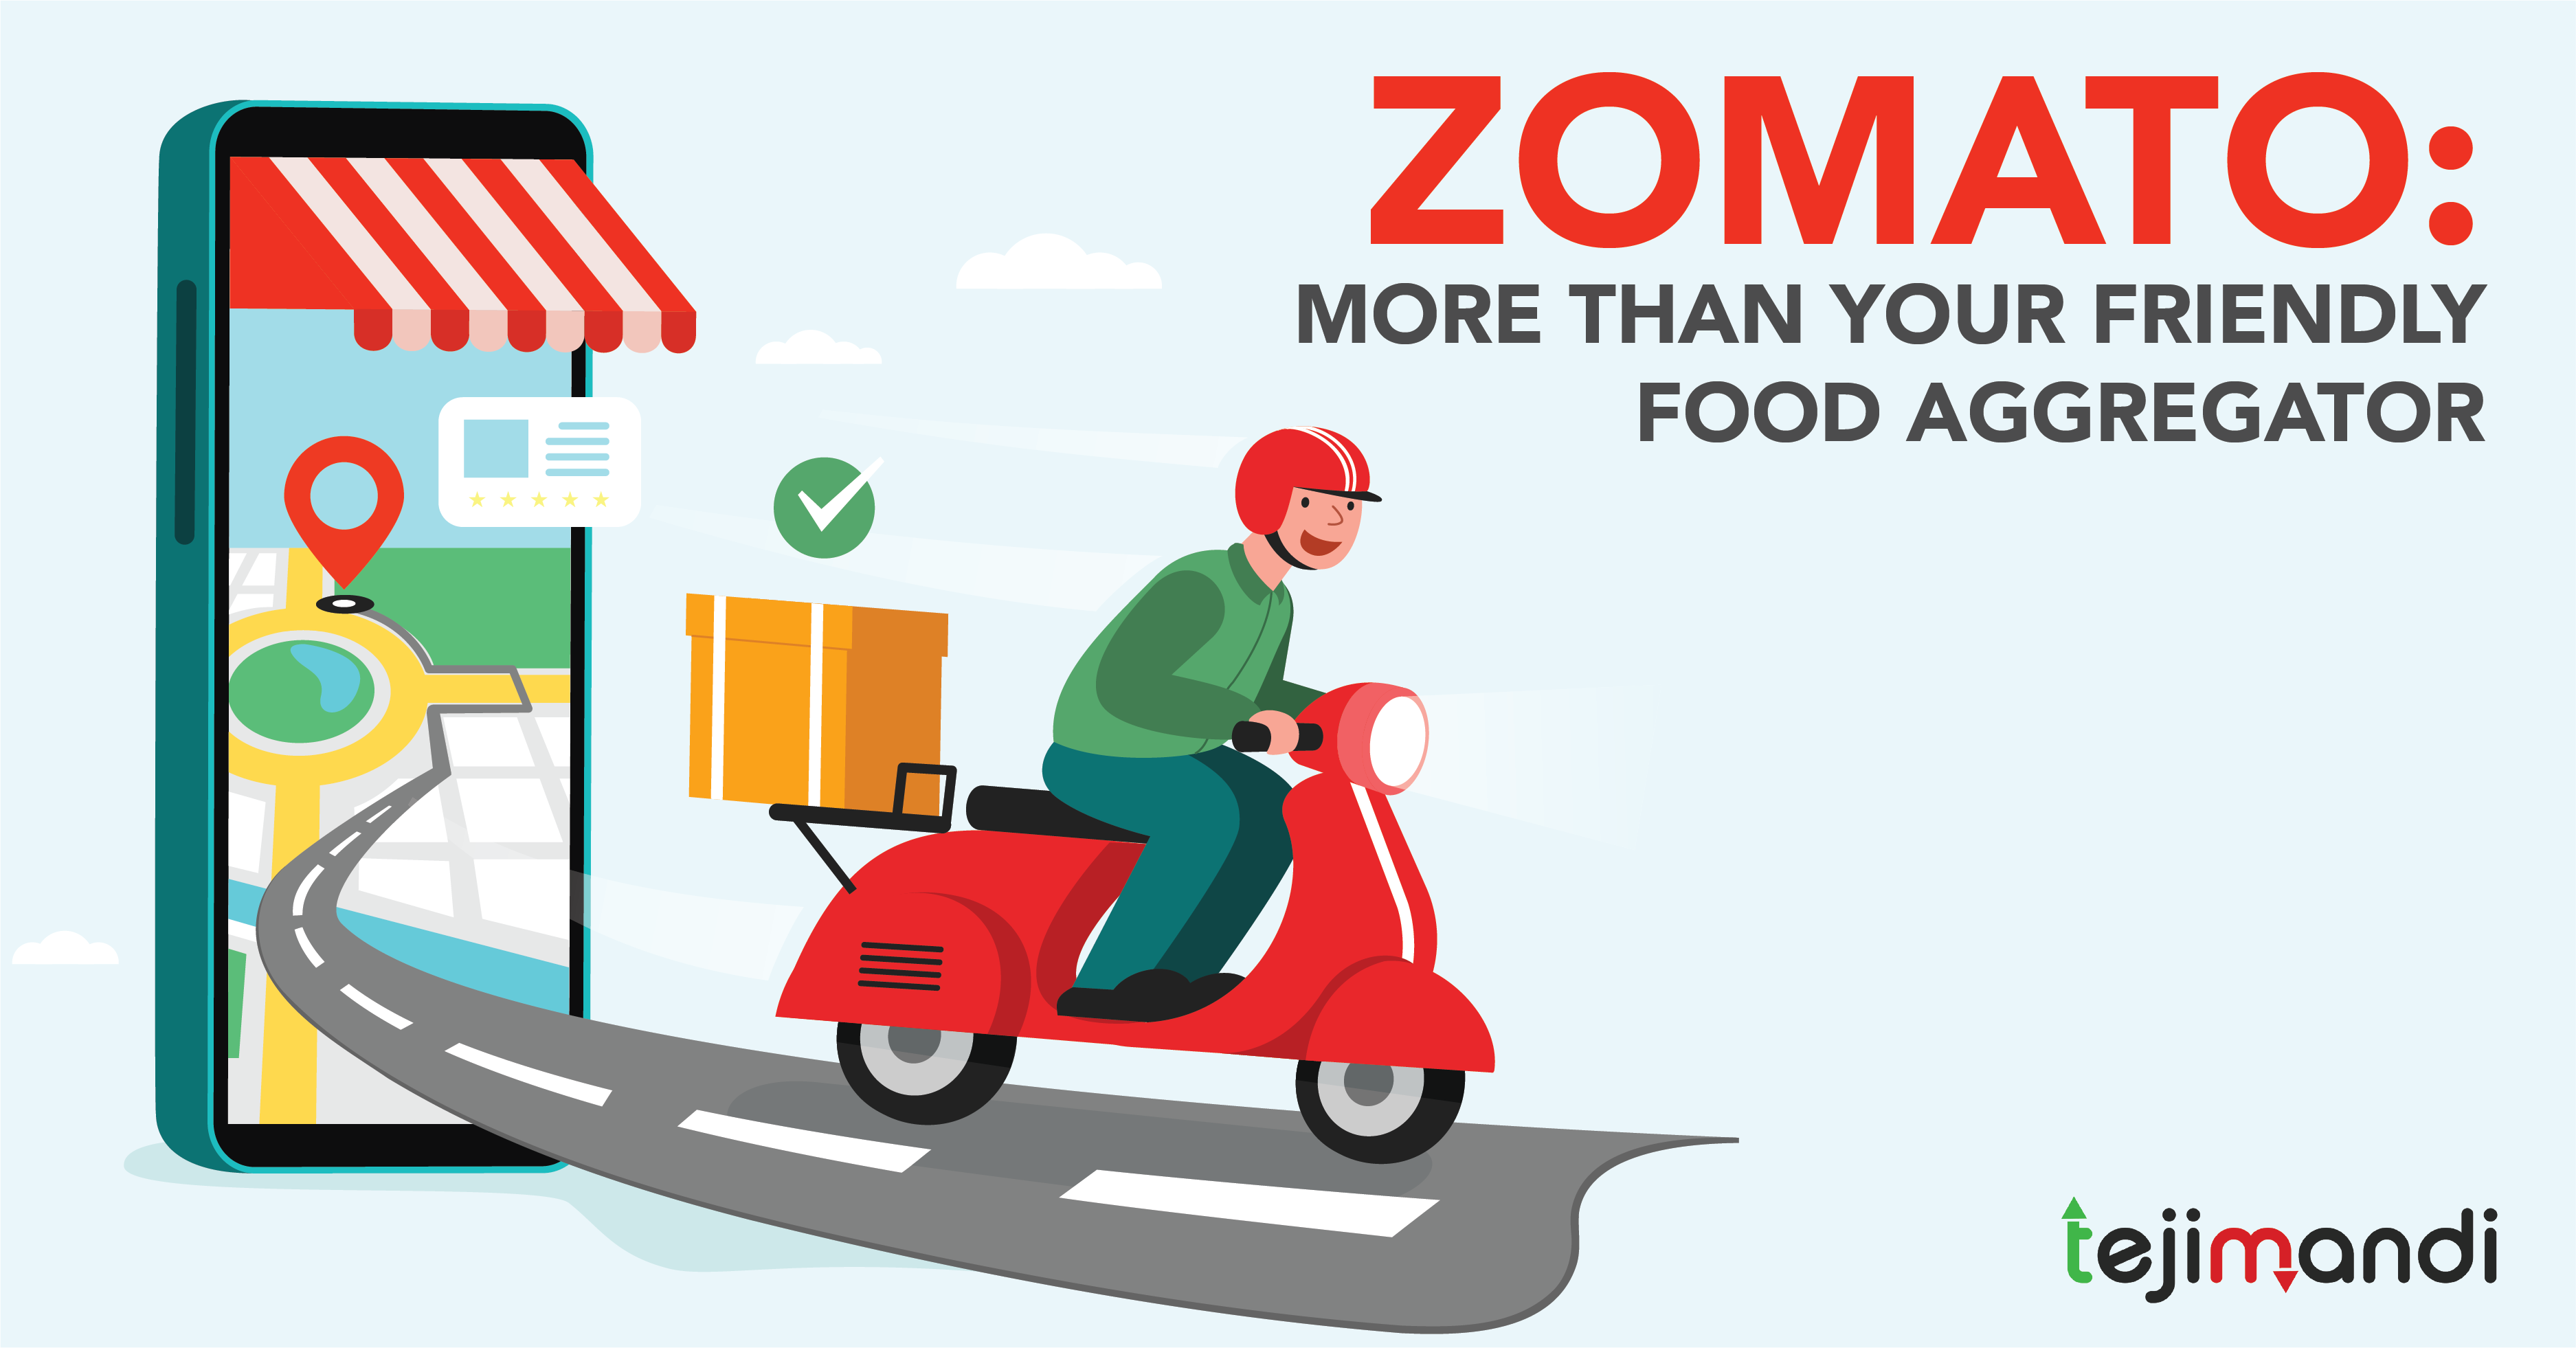

### Introduction 

#### Project Overview

The restaurant industry significantly shapes regional culinary cultures, influenced by
urbanization and increasing dining-out trends. This study utilizes a Zomato dataset to
analyze consumer preferences, spending habits, and service expectations in India. Starting
with over 200,000 rows, data cleaning narrowed it down to 55,000 unique restaurants,
ensuring accurate insights. Through exploratory data analysis (EDA), the research identifies
patterns in restaurant distribution, types, cuisine preferences, and pricing, providing valuable
information for restaurateurs and investors. The study aims to highlight growth opportunities
and identify profitable restaurant types in India.

### This is a summary of the used libraries:

##### Numerical Python: 
Optimised for mathematical calculations, it manages multidimensional data, resulting in appropriate for diverse datasets.

##### Pandas: 
Constructed upon NumPy, it offers advanced data structures such as Series and DataFrames for proficient data analysis and manipulation.

##### Matplotlib:
A multifaceted library for generating static, animated, and interactive visualisations providing comprehensive customisation alternatives for various plot kinds.

##### Seaborn: 
Constructed upon Matplotlib, it facilitates the generation of statistical visuals and integrates well. Utilising pandas DataFrames for improved data exploration and visualisation.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print('All modules imported Successfully')

All modules imported Successfully


In [3]:
df =pd.read_csv(r"C:\Users\Vimal\Desktop\zomato_restaurants_in_India.csv")
print('Data Loaded Successfully')

Data Loaded Successfully


### Data Cleaning

In [4]:
df.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [5]:
print(f"number of Coloumns:{df.shape[1]}\nNumber of rows :{df.shape[0]}")

number of Coloumns:26
Number of rows :211944


In [6]:
# To check redundant
df['res_id'].nunique()

55568

In [7]:
df.drop_duplicates(['res_id'],keep='first',inplace=True)

In [8]:
print(f"number of Coloumns:{df.shape[1]}\nNumber of rows :{df.shape[0]}")

number of Coloumns:26
Number of rows :55568


### now set the res_id as a index
res_id serves as a unique identifier for each row 
(e.g., reservation IDs, order IDs), and designating it as the index facilitates the identification 
and manipulation of certain rows based on that ID.

In [15]:

df.set_index('res_id',inplace=True)

In [14]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18896796,Haweli Da Dhaba,['Quick Bites'],https://www.zomato.com/ranchi/haweli-da-dhaba-...,"Behind Gumla Petrol Pump, Booty More, B.I.T, R...",Ranchi,27,B.I.T,23.398692,85.386854,NaN,...,1,Rs.,"['No Seating Available', 'Dinner', 'Cash', 'De...",3.7,Good,124,28,0.0,1,-1


In [9]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
2901460,Sher-e-Punjab,['Casual Dining'],https://www.zomato.com/bhubaneswar/sher-e-punj...,"Plot M9/13, Panchasakha Nagar, Jagamara, Arya ...",Bhubaneshwar,29,Khandagiri,20.249748,85.798173,NaN,...,2,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'Lu...",3.7,Good,746,111,0.0,1,-1


In [10]:
# use to check datatype and nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55568 entries, 3400299 to 3201138
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  55568 non-null  object 
 1   establishment         55568 non-null  object 
 2   url                   55568 non-null  object 
 3   address               55550 non-null  object 
 4   city                  55568 non-null  object 
 5   city_id               55568 non-null  int64  
 6   locality              55568 non-null  object 
 7   latitude              55568 non-null  float64
 8   longitude             55568 non-null  float64
 9   zipcode               10945 non-null  object 
 10  country_id            55568 non-null  int64  
 11  locality_verbose      55568 non-null  object 
 12  cuisines              55098 non-null  object 
 13  timings               54565 non-null  object 
 14  average_cost_for_two  55568 non-null  int64  
 15  price_range     

In [16]:
df.describe()

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.000000,55568.000000,55568.000000,55568.0,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55556.0,55568.000000,55568.0
mean,3409.499298,21.450847,76.497131,1.0,528.205874,1.714728,2.958593,223.330352,160.974770,0.0,-0.349824,-1.0
std,5174.942737,42.901135,10.982976,0.0,595.028447,0.878227,1.464576,618.224019,586.975382,0.0,0.933794,0.0
min,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,8.000000,16.518374,74.645885,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0
50%,26.000000,22.468629,77.106348,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,0.0,-1.000000,-1.0
75%,11294.000000,26.752959,79.831641,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,0.0,1.000000,-1.0
max,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [17]:
df.describe().round()

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55556.0,55568.0,55568.0
mean,3409.0,21.0,76.0,1.0,528.0,2.0,3.0,223.0,161.0,0.0,-0.0,-1.0
std,5175.0,43.0,11.0,0.0,595.0,1.0,1.0,618.0,587.0,0.0,1.0,0.0
min,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-18.0,0.0,0.0,-1.0,-1.0
25%,8.0,17.0,75.0,1.0,200.0,1.0,3.0,6.0,1.0,0.0,-1.0,-1.0
50%,26.0,22.0,77.0,1.0,350.0,1.0,4.0,35.0,10.0,0.0,-1.0,-1.0
75%,11294.0,27.0,80.0,1.0,600.0,2.0,4.0,175.0,69.0,0.0,1.0,-1.0
max,11354.0,10000.0,92.0,1.0,30000.0,4.0,5.0,42539.0,17702.0,0.0,1.0,-1.0


In [13]:
#timings,currency

In [18]:
df.isna().sum()

name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

<Axes: ylabel='res_id'>

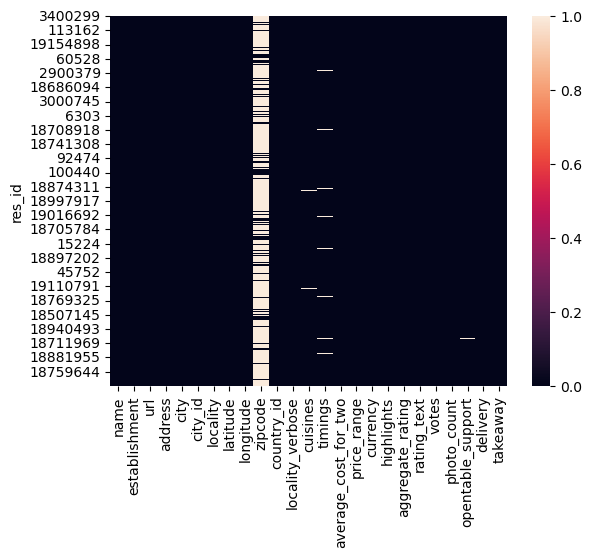

In [19]:
# To check null value for better comprehension of data frame
sns.heatmap(df.isna())

In [20]:
#This code is used to calculate and present the percentage of missing values for each column in a DataFrame (df).
(df.isnull().sum()/len(df)*100)


name                     0.000000
establishment            0.000000
url                      0.000000
address                  0.032393
city                     0.000000
city_id                  0.000000
locality                 0.000000
latitude                 0.000000
longitude                0.000000
zipcode                 80.303412
country_id               0.000000
locality_verbose         0.000000
cuisines                 0.845811
timings                  1.804996
average_cost_for_two     0.000000
price_range              0.000000
currency                 0.000000
highlights               0.000000
aggregate_rating         0.000000
rating_text              0.000000
votes                    0.000000
photo_count              0.000000
opentable_support        0.021595
delivery                 0.000000
takeaway                 0.000000
dtype: float64

#### From Above Analysis We get that 80.3% is missing in zipcode coloumn of Data frame

In [17]:
#zipcode-todo later

#### Statstical Analysis

In [18]:
df.describe().round()

,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55568.0,55556.0,55568.0,55568.0
mean,3409.0,21.0,76.0,1.0,528.0,2.0,3.0,223.0,161.0,0.0,-0.0,-1.0
std,5175.0,43.0,11.0,0.0,595.0,1.0,1.0,618.0,587.0,0.0,1.0,0.0
min,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-18.0,0.0,0.0,-1.0,-1.0
25%,8.0,17.0,75.0,1.0,200.0,1.0,3.0,6.0,1.0,0.0,-1.0,-1.0
50%,26.0,22.0,77.0,1.0,350.0,1.0,4.0,35.0,10.0,0.0,-1.0,-1.0
75%,11294.0,27.0,80.0,1.0,600.0,2.0,4.0,175.0,69.0,0.0,1.0,-1.0
max,11354.0,10000.0,92.0,1.0,30000.0,4.0,5.0,42539.0,17702.0,0.0,1.0,-1.0


In [19]:
df['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [20]:
df['establishment'].nunique()

27

##### The code retrieves all unique values from the establishment column using .unique() and displays them. 

In [21]:
for i in (df['establishment'].unique()):
    print(df['establishment'])

res_id
3400299         ['Quick Bites']
3400005         ['Quick Bites']
3401013         ['Quick Bites']
3400290         ['Quick Bites']
3401744       ['Casual Dining']
                   ...         
19142822    ['Dessert Parlour']
18984164      ['Casual Dining']
18019952      ['Casual Dining']
3200996         ['Quick Bites']
3201138         ['Quick Bites']
Name: establishment, Length: 55568, dtype: object
res_id
3400299         ['Quick Bites']
3400005         ['Quick Bites']
3401013         ['Quick Bites']
3400290         ['Quick Bites']
3401744       ['Casual Dining']
                   ...         
19142822    ['Dessert Parlour']
18984164      ['Casual Dining']
18019952      ['Casual Dining']
3200996         ['Quick Bites']
3201138         ['Quick Bites']
Name: establishment, Length: 55568, dtype: object
res_id
3400299         ['Quick Bites']
3400005         ['Quick Bites']
3401013         ['Quick Bites']
3400290         ['Quick Bites']
3401744       ['Casual Dining']
               

In [22]:
# The is to clean the establishment column by deleting redundant characters at the beginning and end of the strings.
df['establishment']=df['establishment'].apply(lambda X:X[2:-2])


###### During data cleaning, we replaced any empty strings in the establishment column with the placeholder 'NA' 
###### to handle missing values uniformly. This ensures consistency and prepares the data for further analysis.

In [23]:
df['establishment']=df['establishment'].apply(lambda X:np.where(X=="","NA",X))

In [24]:
df['establishment'].nunique()

27

In [25]:
df['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

# TODO
1>>Zipcode
2>>Timings


In [26]:
df['zipcode'].fillna('Others',inplace=True)

In [27]:
df['zipcode'].isna().sum()

0

In [28]:
df['timings']

res_id
3400299                            8:30am – 10:30pm (Mon-Sun)
3400005     12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
3401013                                      9:30 AM to 11 PM
3400290                                  8am – 11pm (Mon-Sun)
3401744                                  11:30 AM to 11:30 PM
                                  ...                        
19142822                                 11 AM to 12 Midnight
18984164                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
18019952                   11 AM to 3:30 PM, 7 PM to 10:30 PM
3200996     4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
3201138                                          8 AM to 1 AM
Name: timings, Length: 55568, dtype: object

In [29]:
df['timings'].nunique()

7740

In [30]:
df['currency'].unique()

array(['Rs.'], dtype=object)

In [31]:
df[df['establishment']=='NA'].shape

(1830, 25)

In [32]:
df['establishment'].replace('NA','Other establishment',inplace=True)

In [33]:
df['establishment']

res_id
3400299         Quick Bites
3400005         Quick Bites
3401013         Quick Bites
3400290         Quick Bites
3401744       Casual Dining
                 ...       
19142822    Dessert Parlour
18984164      Casual Dining
18019952      Casual Dining
3200996         Quick Bites
3201138         Quick Bites
Name: establishment, Length: 55568, dtype: object

In [34]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18697519,Royal Bakery,Bakery,https://www.zomato.com/alappuzha/royal-bakery-...,"Sharon Building, Vadackal, Alappuzha",Alappuzha,11297,Vadackal,9.466108,76.338077,Others,...,1,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",0.0,Not rated,0,0,0.0,-1,-1


### TOP DATA ANALYSIS

In [35]:
df['city'].value_counts().head(20)

city
Bangalore     2247
Mumbai        2022
Pune          1843
Chennai       1827
New Delhi     1704
Jaipur        1395
Kolkata       1361
Ahmedabad     1247
Goa           1150
Lucknow       1135
Nagpur        1039
Indore        1026
Coimbatore     976
Surat          970
Vadodara       963
Ludhiana       948
Bhopal         906
Kochi          897
Agra           833
Hyderabad      822
Name: count, dtype: int64

In [36]:
top_20_cities=df['city'].value_counts().head(20).reset_index
top_20_cities


<bound method Series.reset_index of city
Bangalore     2247
Mumbai        2022
Pune          1843
Chennai       1827
New Delhi     1704
Jaipur        1395
Kolkata       1361
Ahmedabad     1247
Goa           1150
Lucknow       1135
Nagpur        1039
Indore        1026
Coimbatore     976
Surat          970
Vadodara       963
Ludhiana       948
Bhopal         906
Kochi          897
Agra           833
Hyderabad      822
Name: count, dtype: int64>

In [24]:
top_20_cities = df['city'].value_counts().head(20).reset_index()
top_20_cities.head(5)

,city,count
0,Bangalore,2247
1,Mumbai,2022
2,Pune,1843
3,Chennai,1827
4,New Delhi,1704


In [25]:
import seaborn as sns


The bar graph showing the top 20 cities ranked by number of Restaurants ,here are some
insights:
Bangalore and Mumbai have the highest number of restaurants among the cities listed.
There is a noticeable drop after Bangalore and Mumbai .in the number of restaurants
for the next group of cities like Pune, Chennai, and New Delhi,Jabalpur
The cities towards the bottom of the graph like Kochi, Agra, and Hyderabad have
relatively fewer restaurants compared to the top cities.
As you can see that metro cities have more number of restaurants than others with
South India dominating the Top 4 (Bangalore, Pune , Mumbai, Chennai)
In [ ]:


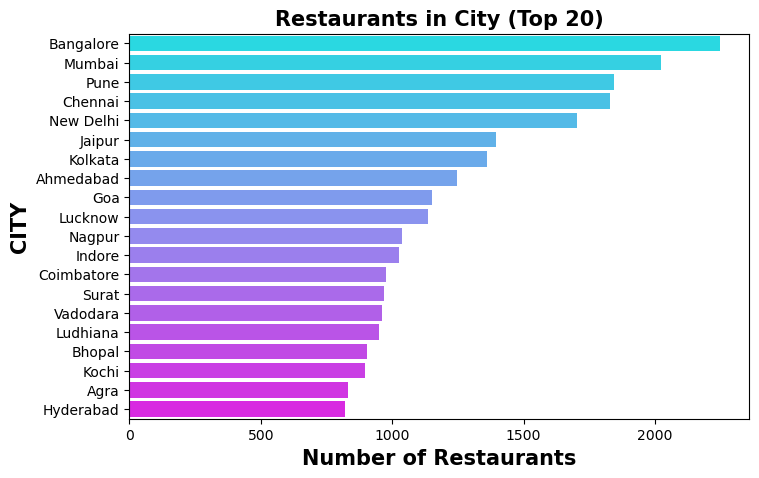

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(y='city',x='count',data=top_20_cities,palette='cool')
plt.title('Restaurants in City (Top 20)',fontsize=15,fontweight='bold')
plt.ylabel('CITY',fontsize=15,fontweight='bold')
plt.xlabel('Number of Restaurants',fontsize=15,fontweight='bold')
plt.show()

In [27]:
Bottom_10_cities=df['city'].value_counts().tail(10).reset_index
Bottom_10_cities

<bound method Series.reset_index of city
Gandhinagar      96
Secunderabad     90
Ghaziabad        90
Nasik            83
Faridabad        79
Udupi            60
Howrah           50
Neemrana         26
Greater Noida    21
Nayagaon         15
Name: count, dtype: int64>

In [31]:
Bottom_10_cities = df['city'].value_counts().tail(10).reset_index()
Bottom_10_cities.head()


,city,count
0,Gandhinagar,96
1,Secunderabad,90
2,Ghaziabad,90
3,Nasik,83
4,Faridabad,79


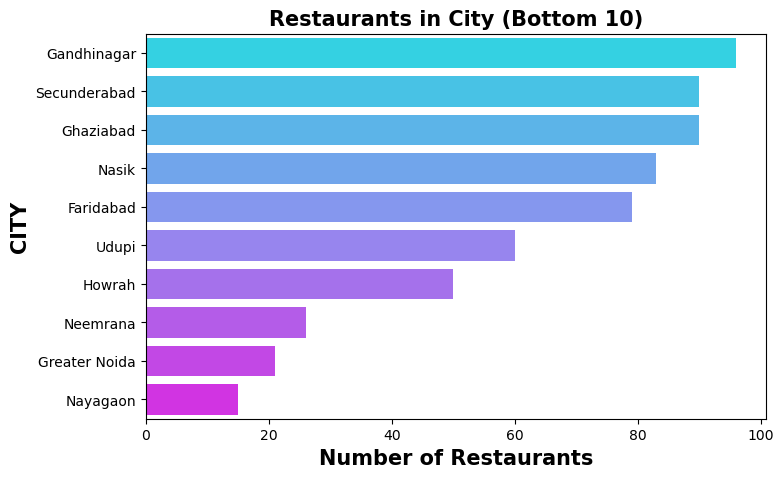

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(y='city', x='count', data=Bottom_10_cities, palette='cool')

# Customize the plot
plt.title('Restaurants in City (Bottom 10)', fontsize=15, fontweight='bold')
plt.ylabel('CITY', fontsize=15, fontweight='bold')
plt.xlabel('Number of Restaurants', fontsize=15, fontweight='bold')

plt.show()

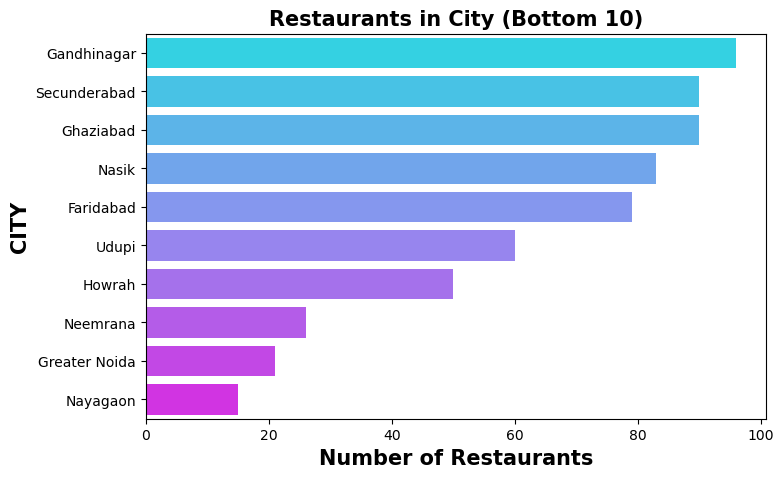

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(y='city',x='count',data=Bottom_10_cities,palette='cool')
plt.title('Restaurants in City (Bottom 10)',fontsize=15,fontweight='bold')
plt.ylabel('CITY',fontsize=15,fontweight='bold')
plt.xlabel('Number of Restaurants',fontsize=15,fontweight='bold')
plt.show()

In [42]:
df.sample()

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18826997,Vivid Restaurant,Casual Dining,https://www.zomato.com/jamnagar/vivid-restaura...,"Shreekar Complex, Palace Road, Palace Ground R...",Jamnagar,11321,Bedeswar,22.475366,70.054799,Others,...,1,Rs.,[],0.0,Not rated,0,0,0.0,-1,-1


In [43]:
Top_10_name=df['name'].value_counts().head(10).reset_index
Top_10_name

<bound method Series.reset_index of name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64>

In [36]:
top_20_name = df['name'].value_counts().head(20).reset_index()

In [37]:
top_20_name.head()


,name,count
0,Domino's Pizza,399
1,Cafe Coffee Day,315
2,KFC,204
3,Baskin Robbins,202
4,Keventers,189


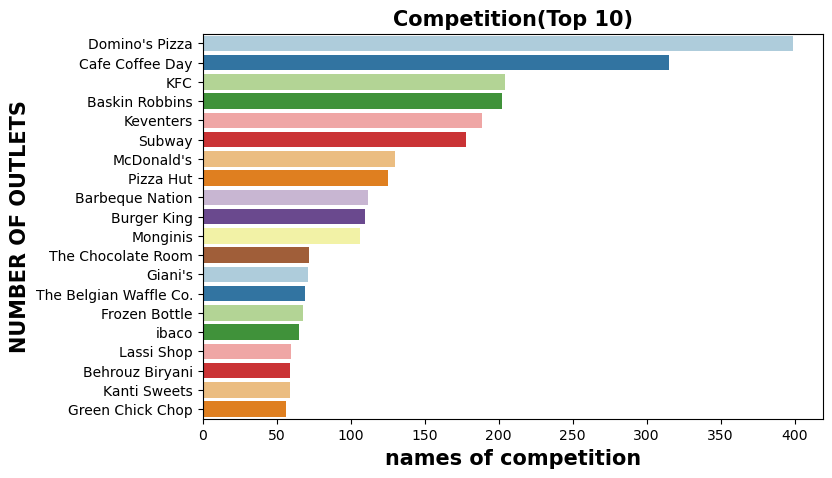

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(y='name',x='count',data=top_20_name,palette='Paired')

plt.title('Competition(Top 10)',fontsize=15,fontweight='bold')
plt.xlabel('names of competition',fontsize=15,fontweight='bold')
plt.ylabel('NUMBER OF OUTLETS',fontsize=15,fontweight='bold')


plt.show()

### df.[]

In [45]:
by_establishment=df['establishment'].value_counts().head(10).reset_index()



In [46]:
by_establishment

,establishment,count
0,Quick Bites,14032
1,Casual Dining,12270
2,Café,4123
3,Bakery,3741
4,Dessert Parlour,3675
5,Sweet Shop,2615
6,Beverage Shop,2440
7,Other establishment,1830
8,Fine Dining,1535
9,Food Court,1494


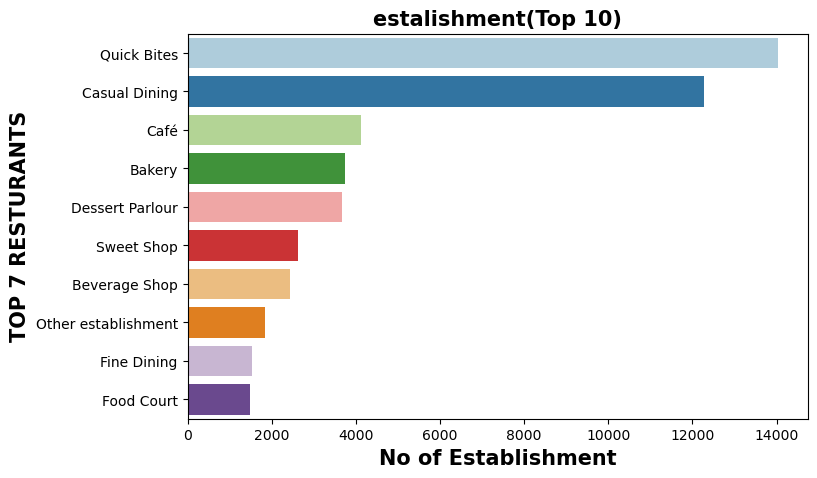

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(y='establishment',x='count',data=by_establishment,palette='Paired')

plt.title('estalishment(Top 10)',fontsize=15,fontweight='bold')
plt.xlabel('No of Establishment',fontsize=15,fontweight='bold')
plt.ylabel('TOP 7 RESTURANTS',fontsize=15,fontweight='bold')


plt.show()

In [48]:
by_cuisines=df['cuisines'].value_counts().head(10).reset_index()

In [49]:
by_cuisines

,cuisines,count
0,North Indian,4295
1,Fast Food,2025
2,"North Indian, Chinese",1636
3,Bakery,1585
4,South Indian,1489
5,Street Food,1187
6,Cafe,1098
7,Mithai,1020
8,Desserts,922
9,"Bakery, Desserts",836


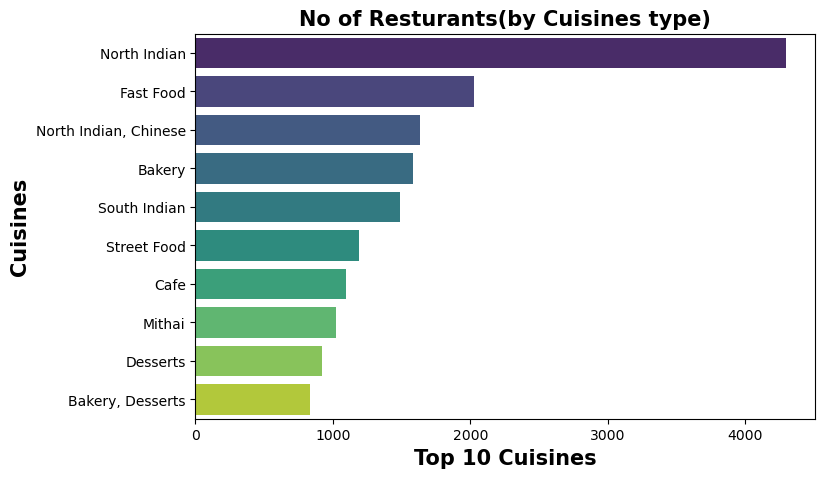

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(y='cuisines',x='count',data=by_cuisines,palette='viridis')

plt.title('No of Resturants(by Cuisines type)',fontsize=15,fontweight='bold')
plt.xlabel('Top 10 Cuisines',fontsize=15,fontweight='bold')
plt.ylabel('Cuisines',fontsize=15,fontweight='bold')


plt.show()

In [51]:
df['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

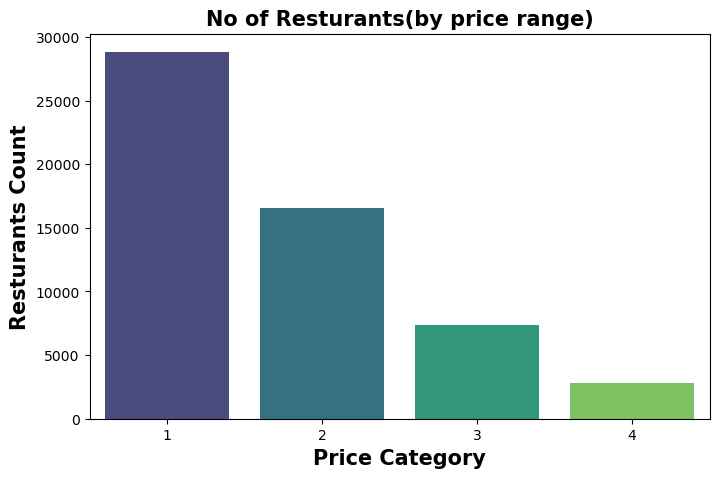

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_range',data=df,palette='viridis')

plt.title('No of Resturants(by price range)',fontsize=15,fontweight='bold')
plt.xlabel('Price Category',fontsize=15,fontweight='bold')
plt.ylabel('Resturants Count',fontsize=15,fontweight='bold')


plt.show()

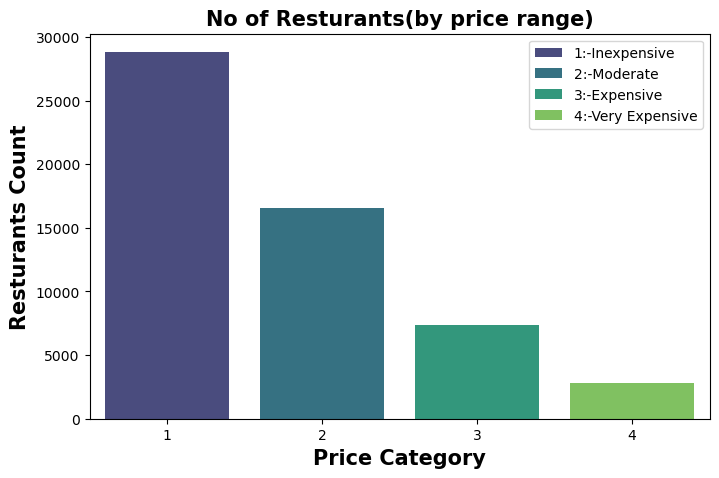

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_range',data=df,palette='viridis',label=['1:-Inexpensive','2:-Moderate','3:-Expensive','4:-Very Expensive'])

plt.title('No of Resturants(by price range)',fontsize=15,fontweight='bold')
plt.xlabel('Price Category',fontsize=15,fontweight='bold')
plt.ylabel('Resturants Count',fontsize=15,fontweight='bold')
plt.legend()

plt.show()

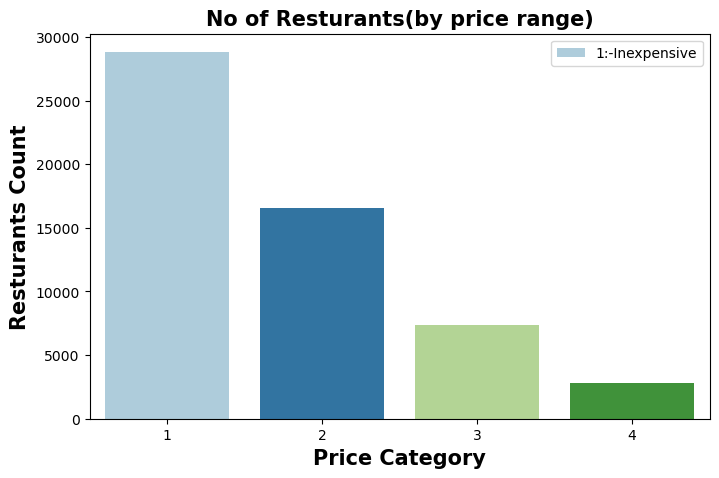

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='price_range',data=df,palette='Paired')

plt.title('No of Resturants(by price range)',fontsize=15,fontweight='bold')
plt.xlabel('Price Category',fontsize=15,fontweight='bold')
plt.ylabel('Resturants Count',fontsize=15,fontweight='bold')
plt.legend(['1:-Inexpensive','2:-moderate','3:-expensive','4:-very Expensive'])

plt.show()

In [55]:
df[df['price_range'] == 1]['average_cost_for_two'].max()

450

In [56]:
p1max=df[df['price_range'] == 1]['average_cost_for_two'].max()
p2max=df[df['price_range'] == 2]['average_cost_for_two'].max()
p3max=df[df['price_range'] == 3]['average_cost_for_two'].max()
p4max=df[df['price_range'] == 4]['average_cost_for_two'].max()


p1min=df[df['price_range'] == 1]['average_cost_for_two'].min()
p2min=df[df['price_range'] == 2]['average_cost_for_two'].min()
p3min=df[df['price_range'] == 3]['average_cost_for_two'].min()
p4min=df[df['price_range'] == 4]['average_cost_for_two'].min()

print(p1max,p2max,p3max,p4max)
print(p1min,p2min,p3min,p4min)

450 999 1900 30000
0 250 500 1000


In [57]:
 prices=pd.DataFrame({'Price Category':[1,2,3,4],
                     'price range':['50-450','250-999','500-1900','1000-30000']},index=range(1,5))

In [58]:
prices

,Price Category,price range
1,1,50-450
2,2,250-999
3,3,500-1900
4,4,1000-30000


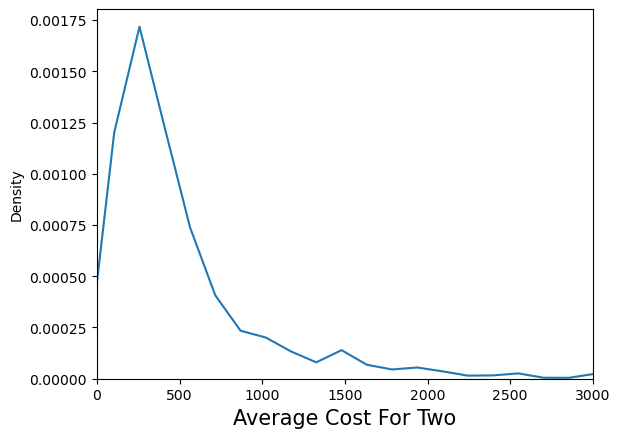

In [59]:
sns.kdeplot(df['average_cost_for_two'])
plt.xlim(0,3000)
plt.xlabel('Average Cost For Two',fontsize=15)
plt.show()

In [60]:
df.groupby(['name','establishment','city'])['average_cost_for_two']

In [61]:
df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values()

name                                           establishment  city     
Shree  Sai Chinese                             Casual Dining  Amravati         0
Pushkar Cafe                                   Café           Pushkar          0
Pushkar Bakers & Cafe                          Beverage Shop  Pushkar          0
VMK HOTEL                                      Casual Dining  Salem            0
Desi Dilse                                     Café           Vizag            0
                                                                           ...  
Trophy Bar- Umaid Bhawan Palace                Bar            Jodhpur      12000
Fly Dining                                     Fine Dining    Bangalore    14000
Gol Bungalow - Taj Falaknuma Palace            Fine Dining    Hyderabad    15000
Bhairo                                         Fine Dining    Udaipur      15000
Ocean - The Private Dining Room - Sahara Star  Fine Dining    Mumbai       30000
Name: average_cost_for_two, Length: 4

In [62]:
df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()

,name,establishment,city,average_cost_for_two
0,Ocean - The Private Dining Room - Sahara Star,Fine Dining,Mumbai,30000
1,Gol Bungalow - Taj Falaknuma Palace,Fine Dining,Hyderabad,15000
2,Bhairo,Fine Dining,Udaipur,15000
3,Fly Dining,Fine Dining,Bangalore,14000
4,Trophy Bar- Umaid Bhawan Palace,Bar,Jodhpur,12000
5,Pillars - Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
6,Risala- Umaid Bhawan Palace,Fine Dining,Jodhpur,12000
7,Wasabi By Morimoto - The Taj Mahal Palace,Fine Dining,Mumbai,10000
8,Whiskys - Deltin Royale,Bar,Goa,8000
9,Adaa - Taj Falaknuma Palace,Fine Dining,Hyderabad,8000


In [63]:
luxury=df.groupby(['name','establishment','city'])['average_cost_for_two'].max().sort_values(ascending=False).head(10).reset_index()

In [64]:
df[df['name']=='Bhairo']

,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
res_id,,,,,,,,,,,,,,,,,,,,,
18565535,Bhairo,Fine Dining,https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,Others,...,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1


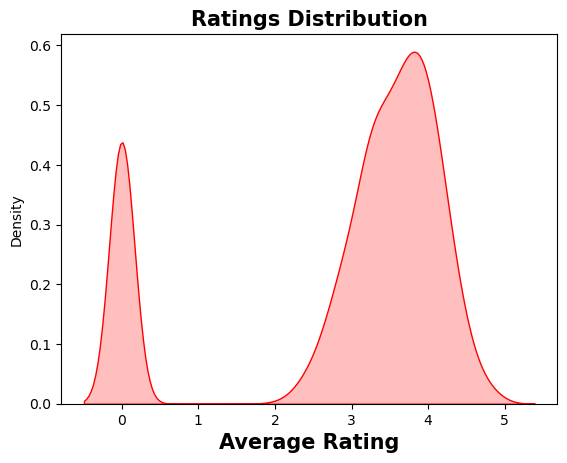

In [65]:
sns.kdeplot(df['aggregate_rating'],shade=True,color='r')

plt.title('Ratings Distribution',fontsize=15,fontweight='bold')
plt.xlabel('Average Rating',fontsize=15,fontweight='bold')
plt.show()

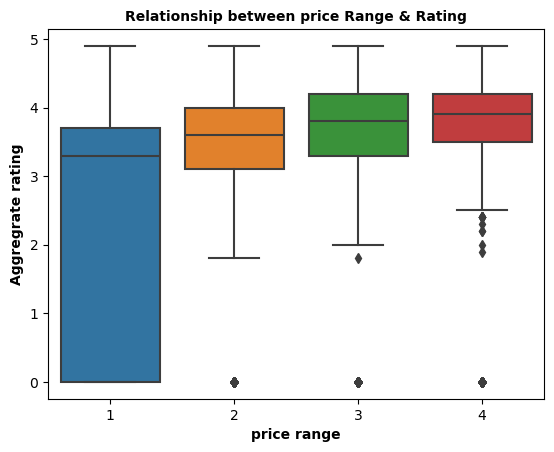

In [66]:
sns.boxplot(x='price_range',y='aggregate_rating',data=df)

plt.title('Relationship between price Range & Rating',fontsize=10,fontweight='bold')
plt.xlabel('price range',fontsize=10,fontweight='bold')

plt.ylabel('Aggregrate rating',fontsize=10,fontweight='bold')
plt.show()

In [67]:
df['highlights']

res_id
3400299     ['Lunch', 'Takeaway Available', 'Credit Card',...
3400005     ['Delivery', 'No Alcohol Available', 'Dinner',...
3401013     ['No Alcohol Available', 'Dinner', 'Takeaway A...
3400290     ['Takeaway Available', 'Credit Card', 'Lunch',...
3401744     ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                  ...                        
19142822    ['Cash', 'Takeaway Available', 'Delivery', 'In...
18984164    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
18019952    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
3200996     ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
3201138     ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object

In [68]:
def check(input_list):
    if'Delivery' in input_list:
        return 'Delivery Available'
    elif 'Takeaway Available' in input_list:
        return 'Takeaway Available'
    else:
        return 'NO Delhivery Available'


In [69]:
df['highlights'].apply(check).value_counts().reset_index()

,highlights,count
0,Takeaway Available,24769
1,Delivery Available,23907
2,NO Delhivery Available,6892


In [74]:
ff=df['highlights'].apply(check).value_counts().reset_index()


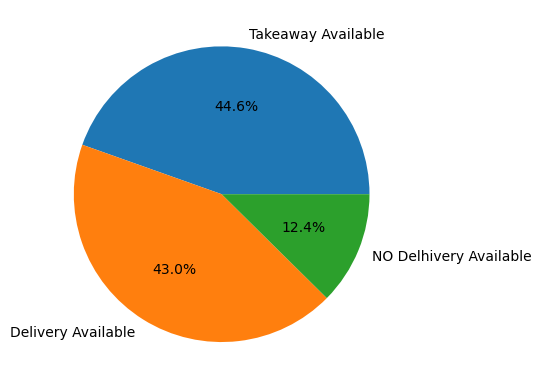

In [75]:
plt.pie(ff['count'],labels=ff['highlights'],autopct='%.1f%%')
plt.show()


In [71]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
from wordcloud import WordCloud 
print('done')

done


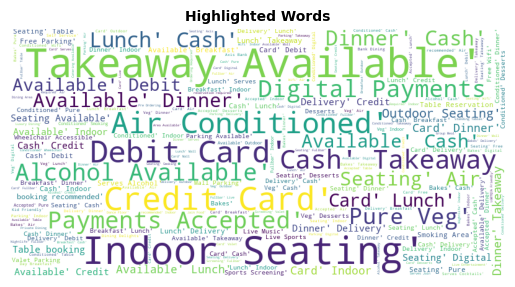

In [73]:
text=''.join(df['highlights'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.title('Highlighted Words',fontsize=10,fontweight='bold')
plt.axis('off')
plt.show()